Hippocratia

Hippocratia is new healthcare based startup, they are trying to develop a product to fight back heart attacks. Their medical research team have managed to put together a drug that relaxes the heart muscles preventing the heart from stopping.

1. Use data augmentation
2. Create new column
3. Prediction model
4. Stremlit module

In [1]:
import numpy as np
import pandas as pd
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl


from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') 

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df['chol_fbs'] = df.chol * df.fbs

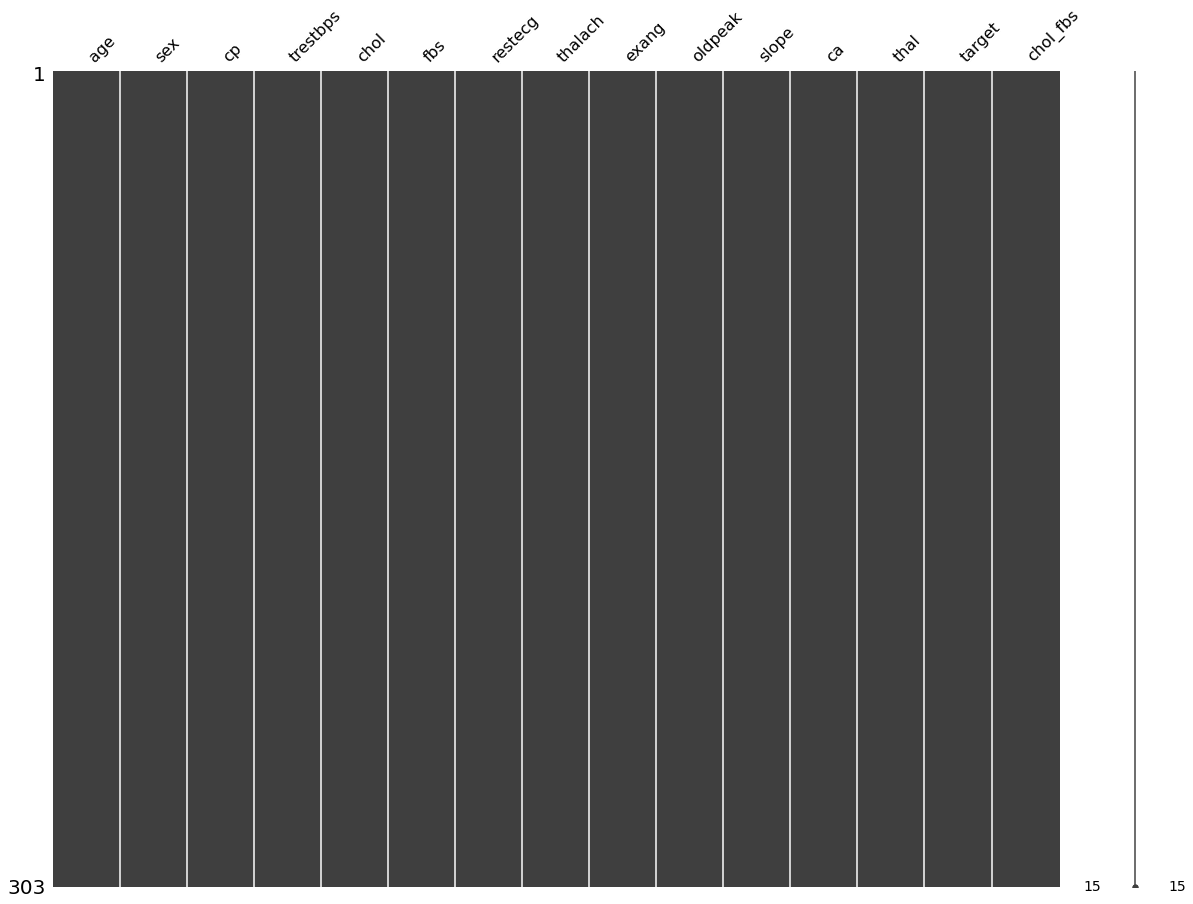

In [7]:
import missingno
missingno.matrix(df, figsize = (20,15))
plt.show()

# Data Augmentation

In [8]:
#Data Augmentation 
import numpy as np
age=df['age']
sex=df['sex']
cp=df['cp']
trestbps=df['trestbps']
chol=df['chol']
fbs=df['fbs']
restecg=df['restecg']
thalach=df['thalach']
exang=df['exang']
oldpeak=df['oldpeak']
slope=df['slope']
ca=df['ca']
thal=df['thal']
target=df['target']

chol_fbs = df['chol_fbs']


In [9]:
age_s=np.std(age)
sex_s=np.std(sex)
cp_s=np.std(cp)
trestbps_s=np.std(trestbps)
chol_s=np.std(chol)
fbs_s=np.std(fbs)
restecg_s=np.std(restecg)
thalach_s=np.std(thalach)
exang_s=np.std(exang)
oldpeak_s=np.std(oldpeak)
slope_s=np.std(slope)
ca_s=np.std(ca)
thal_s=np.std(thal)
target_s=np.std(target)

chol_fbs_s = np.std(chol_fbs)

dataset=[]

### Updated 

In [10]:
df.target.sum()

165

In [11]:
dataset=[]
np.random.seed(0)
for _ in range(1):

    for _,row in df.iterrows():
        temp={
            "age": round(row['age']+np.random.uniform(age_s),0).astype(int),
            
            #"sex": round(row['sex']+np.random.uniform(sex_s),0),
            "sex": int(row['sex']+np.random.randint(0,1)),
            
            "cp": int(row['cp']+np.random.randint(0,3)),
            "trestbps": int(row['trestbps']+np.random.uniform(trestbps_s)),
            "chol": int(row['chol']+np.random.uniform(chol_s)),
            "fbs": int(row['fbs']+np.random.randint(0,1)),
            "restecg": int(row['restecg']+np.random.randint(0,2)),
            "thalach": int(row['thalach']+np.random.uniform(thalach_s)),
            "exang": int(row['exang']+np.random.randint(0,1)),
            "oldpeak": round(row['oldpeak']+np.random.uniform(oldpeak_s),1),
            "slope": int(row['slope']+np.random.uniform(oldpeak_s)),
            "ca": int(row['ca']+np.random.randint(0,4)),
            "thal": int(row['thal']+np.random.randint(0,3)),

            "chol_fbs": round(row['chol_fbs']+np.random.uniform(chol_fbs_s),0).astype(int),

            "target": int(round(row['target']+np.random.uniform(target_s),0)),
            "target": int(row['target']+np.random.randint(0,1)),
          
        }
        dataset.append(temp)
        

print(len(dataset),"augmented data created.")
df_aug=pd.DataFrame(dataset)
df_aug

303 augmented data created.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chol_fbs,target
0,68,1,4,148,241,1,1,163,0,3.4,1,2,1,237,1
1,40,1,4,138,254,0,2,202,0,4.6,1,1,4,78,1
2,46,0,2,139,216,0,0,179,0,2.5,3,0,4,53,1
3,59,1,1,128,286,0,2,197,0,1.9,3,0,3,50,1
4,59,0,1,121,372,0,2,181,1,1.7,3,1,2,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,63,0,0,151,271,0,1,133,1,1.3,2,1,4,65,0
299,51,1,5,116,268,0,1,153,0,2.3,2,2,5,75,0
300,73,1,1,154,240,1,2,162,0,4.5,2,2,4,247,0
301,62,1,1,142,148,0,2,122,1,2.3,2,1,5,74,0


In [12]:
df_aug.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

**25% augmented data**

In [13]:
df_aug_s = df_aug.sample(76,random_state=0)
df_aug_s.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chol_fbs,target
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,57.684211,0.723684,1.907895,139.486842,270.171053,0.131579,1.039474,161.236842,0.276316,1.886842,2.381579,2.407895,3.355263,79.065789,0.565789
std,9.295462,0.450146,1.387349,19.354581,43.096910,0.340279,0.701252,22.083399,0.450146,0.970957,0.610292,1.576305,0.948036,83.492808,0.498946
min,41.000000,0.000000,0.000000,105.000000,174.000000,0.000000,0.000000,99.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000
25%,50.750000,0.000000,1.000000,126.750000,241.000000,0.000000,1.000000,147.000000,0.000000,1.100000,2.000000,1.000000,3.000000,33.000000,0.000000
50%,58.500000,1.000000,2.000000,137.500000,271.000000,0.000000,1.000000,165.500000,0.000000,1.600000,2.000000,3.000000,3.000000,56.500000,1.000000
75%,64.000000,1.000000,3.000000,150.000000,296.500000,0.000000,2.000000,177.250000,1.000000,2.350000,3.000000,3.250000,4.000000,78.250000,1.000000
max,81.000000,1.000000,5.000000,210.000000,421.000000,1.000000,2.000000,214.000000,1.000000,5.000000,3.000000,6.000000,5.000000,414.000000,1.000000


In [14]:
full_df = pd.concat([df,df_aug_s])
full_df.shape

(379, 15)

In [15]:
full_df['chol_fbs'] = full_df.chol * full_df.fbs

In [16]:
full_df.to_csv("augheart.csv")

In [17]:
df_test = df_aug.sample(50,random_state= 0) 

In [18]:
df_test.to_csv("test.csv")

### Ends

In [19]:
"""print(len(dataset),"augmented data created.")
df_au=pd.DataFrame(dataset)
df_au"""

'print(len(dataset),"augmented data created.")\ndf_au=pd.DataFrame(dataset)\ndf_au'

### Preprocessing &amp; Model definition

In [20]:
print(df.shape)
print(full_df.shape)

(303, 15)
(379, 15)


In [21]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB

     |████████████████████████████████| 166.7 MB 83.9 MB/s 
     |████████████████████████████████| 2.0 MB 25.9 MB/s 
     |████████████████████████████████| 67.3 MB 38 kB/s 


In [22]:
#Variables

cat_vars  = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
num_vars  = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_vars_wfe = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','chol_fbs']

In [23]:
num_4_tree = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=False)),
])

cat_4_tree = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant')),
    #('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
])


num_4_mult = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=True)), # mean, median
    ('scaler', preprocessing.StandardScaler())
])

cat_4_mult = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant')),
    #('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
])


In [24]:
#Preprocessors WITHOUT engineered feature

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_tree, num_vars),
    ('cat', cat_4_tree, cat_vars)
], remainder='drop')


mult_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_mult, num_vars),
    ('cat', cat_4_mult, cat_vars)
], remainder='drop') 


In [25]:
#Preprocessors WITH engineered feature

tree_prepro_wfe = compose.ColumnTransformer(transformers=[
    ('num', num_4_tree, num_vars_wfe),
    ('cat', cat_4_tree, cat_vars)
], remainder='drop')

mult_prepro_wfe = compose.ColumnTransformer(transformers=[
    ('num', num_4_mult, num_vars_wfe),
    ('cat', cat_4_mult, cat_vars)
], remainder='drop') 


In [26]:
mult_models = {
  "LogRegr":        LogisticRegression(),
  "Ridge":          RidgeClassifier(),
  "SVM_lin":         SVC(kernel="linear", probability=True), # C=0.025
  "SVM_rbf":         SVC(kernel='rbf', probability=True),
  "NuSVC":           NuSVC(probability=True),
  "LinearSVC":       LinearSVC(),
  "KNN3":            KNeighborsClassifier(3),
  "KNN5":            KNeighborsClassifier(5),
  "GaussianNB":      GaussianNB()
}

tree_models = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees": ExtraTreesClassifier(),
  "Random Forest": RandomForestClassifier(),
  "AdaBoost": AdaBoostClassifier(),
  "Skl GBM": GradientBoostingClassifier(),
  "Skl HistGBM": GradientBoostingClassifier(),
  "XGBoost": XGBClassifier(),
  'LightGBM': LGBMClassifier(),
  'CatBoost': CatBoostClassifier()}


In [27]:
mult_classifiers = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_models.items()}
tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_models.items()}

models = {**mult_classifiers, **tree_classifiers}

In [28]:
mult_classifiers_wfe = {name: pipeline.make_pipeline(mult_prepro_wfe, model) for name, model in mult_models.items()}
tree_classifiers_wfe = {name: pipeline.make_pipeline(tree_prepro_wfe, model) for name, model in tree_models.items()}

models_wfe = {**mult_classifiers_wfe, **tree_classifiers_wfe}

### Predicting on original dataset

In [29]:
x = df[num_vars + cat_vars]
y = df.target

x_train, x_val, y_train, y_val = model_selection.train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)


In [30]:
x.head()

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,63,145,233,150,2.3,1,3,1,0,0,0,0,1
1,37,130,250,187,3.5,1,2,0,1,0,0,0,2
2,41,130,204,172,1.4,0,1,0,0,0,2,0,2
3,56,120,236,178,0.8,1,1,0,1,0,2,0,2
4,57,120,354,163,0.6,0,0,0,1,1,2,0,2


In [31]:
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})


for model_name, model in models.items():
    
    start_time = time.time()
    model.fit(x_train,y_train)
    pred = model.predict(x_val)
    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              

1:	learn: 0.6846383	total: 48.7ms	remaining: 24.3s
2:	learn: 0.6801672	total: 49.5ms	remaining: 16.5s
3:	learn: 0.6748581	total: 50.4ms	remaining: 12.5s
4:	learn: 0.6715237	total: 51.2ms	remaining: 10.2s
5:	learn: 0.6677524	total: 52.1ms	remaining: 8.63s
6:	learn: 0.6645073	total: 52.9ms	remaining: 7.5s
7:	learn: 0.6606824	total: 53.7ms	remaining: 6.66s
8:	learn: 0.6563728	total: 54.6ms	remaining: 6.01s
9:	learn: 0.6536571	total: 55.2ms	remaining: 5.47s
10:	learn: 0.6511385	total: 55.7ms	remaining: 5.01s
11:	learn: 0.6474795	total: 56.6ms	remaining: 4.66s
12:	learn: 0.6441003	total: 57.4ms	remaining: 4.36s
13:	learn: 0.6400368	total: 58.3ms	remaining: 4.11s
14:	learn: 0.6368866	total: 59.2ms	remaining: 3.88s
15:	learn: 0.6327358	total: 60ms	remaining: 3.69s
16:	learn: 0.6289195	total: 60.9ms	remaining: 3.52s
17:	learn: 0.6251071	total: 62.2ms	remaining: 3.39s
18:	learn: 0.6215853	total: 63ms	remaining: 3.25s
19:	learn: 0.6174848	total: 64.1ms	remaining: 3.14s
20:	learn: 0.6145854	total

In [32]:
results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

,Model,Accuracy,Bal Acc.,Time
1,CatBoost,86.885246,86.796537,1.225873
2,SVM_lin,86.885246,86.255411,0.042355
3,XGBoost,86.885246,86.525974,0.059658
4,Ridge,85.245902,84.740260,0.035813
5,Skl HistGBM,85.245902,85.010823,0.089335
6,Skl GBM,85.245902,85.010823,0.089847
7,Extra Trees,85.245902,85.010823,0.116059
8,LogRegr,85.245902,84.740260,0.028749
9,LinearSVC,85.245902,84.740260,0.024475
10,Random Forest,83.606557,83.495671,0.146108


In [53]:
 from sklearn.metrics import confusion_matrix

 confusion_matrix(df_test['target'], test_pred)

NameError: name 'test_pred' is not defined

### Predicting on dataset with extra column

In [52]:
x_wfe = full_df[num_vars_wfe + cat_vars]
y_wfe = full_df.target

In [51]:
print(x_wfe.shape)
print(y_wfe.shape)

(379, 14)
(379,)


In [50]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_wfe,y_wfe,test_size=0.2,stratify=y_wfe,random_state=0)

print(x_train.shape)
print(x_val.shape)

(303, 14)
(76, 14)


In [38]:
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

print(x_train.columns )
print(type(y_train))
for model_name, model in models_wfe.items():

    print(model_name)
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
    
    pred = model.predict(x_val)
    
    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
    
    results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
    results_ord.index += 1 
    
    clear_output(wait=True)
    display(results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d'))

,Model,Accuracy,Bal Acc.,Time
1,SVM_rbf,88.157895,87.605042,0.049378
2,NuSVC,88.157895,87.605042,0.061426
3,SVM_lin,82.894737,83.403361,0.046585
4,LogRegr,81.578947,82.212885,0.032276
5,GaussianNB,81.578947,81.932773,0.022339
6,Ridge,81.578947,82.212885,0.020412
7,Skl GBM,80.263158,80.462185,0.148883
8,Skl HistGBM,80.263158,80.462185,0.141824
9,KNN5,80.263158,79.901961,0.019320
10,LightGBM,78.947368,78.991597,0.091770


In [39]:
print('<3')

<3


In [40]:
x_test = pd.read_csv("test.csv")
x_test = x_test.drop(['Unnamed: 0','target'],axis= 1)

In [41]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chol_fbs
0,71,1,0,154,213,0,2,146,1,3.7,1,3,3,44
1,71,1,5,176,276,0,1,167,0,1.7,2,1,3,58
2,63,1,4,187,336,0,1,165,0,1.3,2,3,5,36
3,67,1,0,129,273,0,1,147,1,3.8,2,4,3,78
4,64,1,3,142,272,0,2,166,0,2.9,2,5,3,56
5,55,1,1,135,278,0,1,171,0,1.6,2,0,5,33
6,42,1,2,123,186,0,0,115,1,3.1,2,2,4,45
7,70,1,0,144,296,0,0,166,0,2.5,2,4,3,56
8,64,0,0,210,329,1,0,140,1,5.0,1,3,3,316
9,68,1,1,141,332,1,1,152,1,2.9,3,6,4,414


In [45]:
y_wfee = full_df['target']


In [49]:
best_model = models_wfe["SVM_rbf"]
best_model.fit(x_wfee,y_wfee)

NameError: name 'x_wfee' is not defined

In [47]:
test_pred = best_model.predict(x_test)

RuntimeError: Given feature/column names do not match the ones for the data given during fit.

In [48]:
sub = pd.DataFrame(test_pred, index=x_test.index, columns=["Target"])

NameError: name 'test_pred' is not defined

In [ ]:
sub.head()

,Target
0,0
1,1
2,0
3,0
4,0


In [ ]:
print("Accuracy:",metrics.accuracy_score(df_test['target'], test_pred))

Accuracy: 0.88


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_test['target'], test_pred)

NameError: name 'df_test' is not defined

In [ ]:

plt.imshow(cm, cmap='binary')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8d599d21-73e5-4f68-954e-8e232bd2cc60' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>